# CASTONE PROJECT 3
## Telco Industries Customer Churn
### Created by : Muchammad Fahd Ishamuddin (DTIDS-0206)

This Project is Part of Purwadhika Bootcamp DTI Data Analyst/Science

## Business Definition and Data Deep Dive

**Context**
A company engaged in telecommunications wants to find customers who subscribe. Many people subscribe to get services from the company. The company wants to know which customers actually subscribe to the services offered with various products. Information related to subscription duration, security, service, and costs.

Target:

0: No Churn

1: Churn

**Problem Statement:**

In the service provider business, it is very vulnerable to the subscription system, and in the business there is a close relationship between customers, where customers can support the needs and life of this telco company.

And if customers are easily reduced, it means that there must be a business model that is changed or marketing that is repeated because it fails to achieve the desired target from the business, besides the business, the existence of churn means that customer service can be labeled bad.

**Goals:**

So based on these problems, the company wants to have the ability to predict the possibility that a customer will/want to stop subscribing or not, so that it can evaluate and analyze this ongoing business.

And also, the company wants to know what/what factors/variables make a customer want to stop subscribing or not, so that they can create a better strategy in approaching potential customers.

**Analytic Approach:**

So what we will do is analyze the data to find patterns that distinguish customers who are still subscribed and those who are not.

Then we will build a classification model that will help the company to be able to predict the probability of customer behavior that still wants to subscribe and those who are not.

**Metric Evaluation**

Type 1 error: False Positive
Consequence: wasted marketing costs, time and resources

Type 2 error: False Negative
Consequence: loss of potential customers

Based on the consequences, then as much as possible what we will do is create a model that can reduce the risk of subscription decline, but without making it a lack/insufficient number of customers who subscribe. So we want as many positive class predictions as possible to be correct, with as few false negative predictions as possible.

### Attribute Information

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| Dependents | Object | Whether the customer has dependents or not |
| Tenure | Num | Number of months the customer has stayed with the company |
| OnlineSecurity | Object | Whether the customer has online security or not |
| OnlineBackup | Object | Whether the customer has online backup or not |
| InternetService | Object | Whether the client is subscribed to Internet service |
| DeviceProtection | Object | Whether the client has device protection or not |
| TechSupport | Object | Whether the client has tech support or not |
| Contract | Object | Type of contract according to duration. |
| PaperlessBilling | Object | Bills issued in paperless form |
| MonthlyCharges | Num | Amount of charge for service on monthly bases |
| Churn | Object | Whether the customer churns or not |


In [3]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from category_encoders import OrdinalEncoder, BinaryEncoder

from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score,cross_validate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline
import joblib
# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

### "Load the data"

In [4]:
df = pd.read_csv('data_telco_customer_churn.csv')

#### -- Explain Info --

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB



- The dataset represents customer profiles who have left the telco company. A churn in telco and other subscription-based services means a situation when the customer leaves the service provider.

In [6]:
len(df)

4930

telco data have len 4930 data

In [7]:
df.describe()

,tenure,MonthlyCharges
count,4930.000000,4930.000000
mean,32.401217,64.883032
std,24.501193,29.923960
min,0.000000,18.800000
25%,9.000000,37.050000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.650000


The `tenure` Column have minimum value `0` this mean not subscription fully, so the `0` value should be dropped

In [8]:
df.describe(include='object')

,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,Churn
count,4930,4930,4930,4930,4930,4930,4930,4930,4930
unique,2,3,3,3,3,3,3,2,2
top,No,No,No,Fiber optic,No,No,Month-to-month,Yes,No
freq,3446,2445,2172,2172,2186,2467,2721,2957,3614


From this Describe we found 2 columns are Numerical and 9 are  Categorical, which is this dataset will have many "Encoding", some use One Hot and other use Ordinal

In [9]:
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [10]:
df = df[df['tenure']>0]

Data with tenure = `0` dropped

In [11]:
df.describe()

,tenure,MonthlyCharges
count,4922.000000,4922.000000
mean,32.453881,64.909224
std,24.486218,29.927394
min,1.000000,18.800000
25%,9.000000,38.325000
50%,29.000000,70.350000
75%,56.000000,89.900000
max,72.000000,118.650000


In [12]:
df.MonthlyCharges.unique()

array([ 72.9 ,  82.65,  47.85, ...,  58.45,  23.65, 108.5 ])

In [13]:
df.isnull().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

In [14]:
df.tenure.min()

1

Our data are not empty so to make sure the data distribution we turn to EDA to doing Visualization the Data

### EDA(Exploratory Data Analysis)

Data Visualization

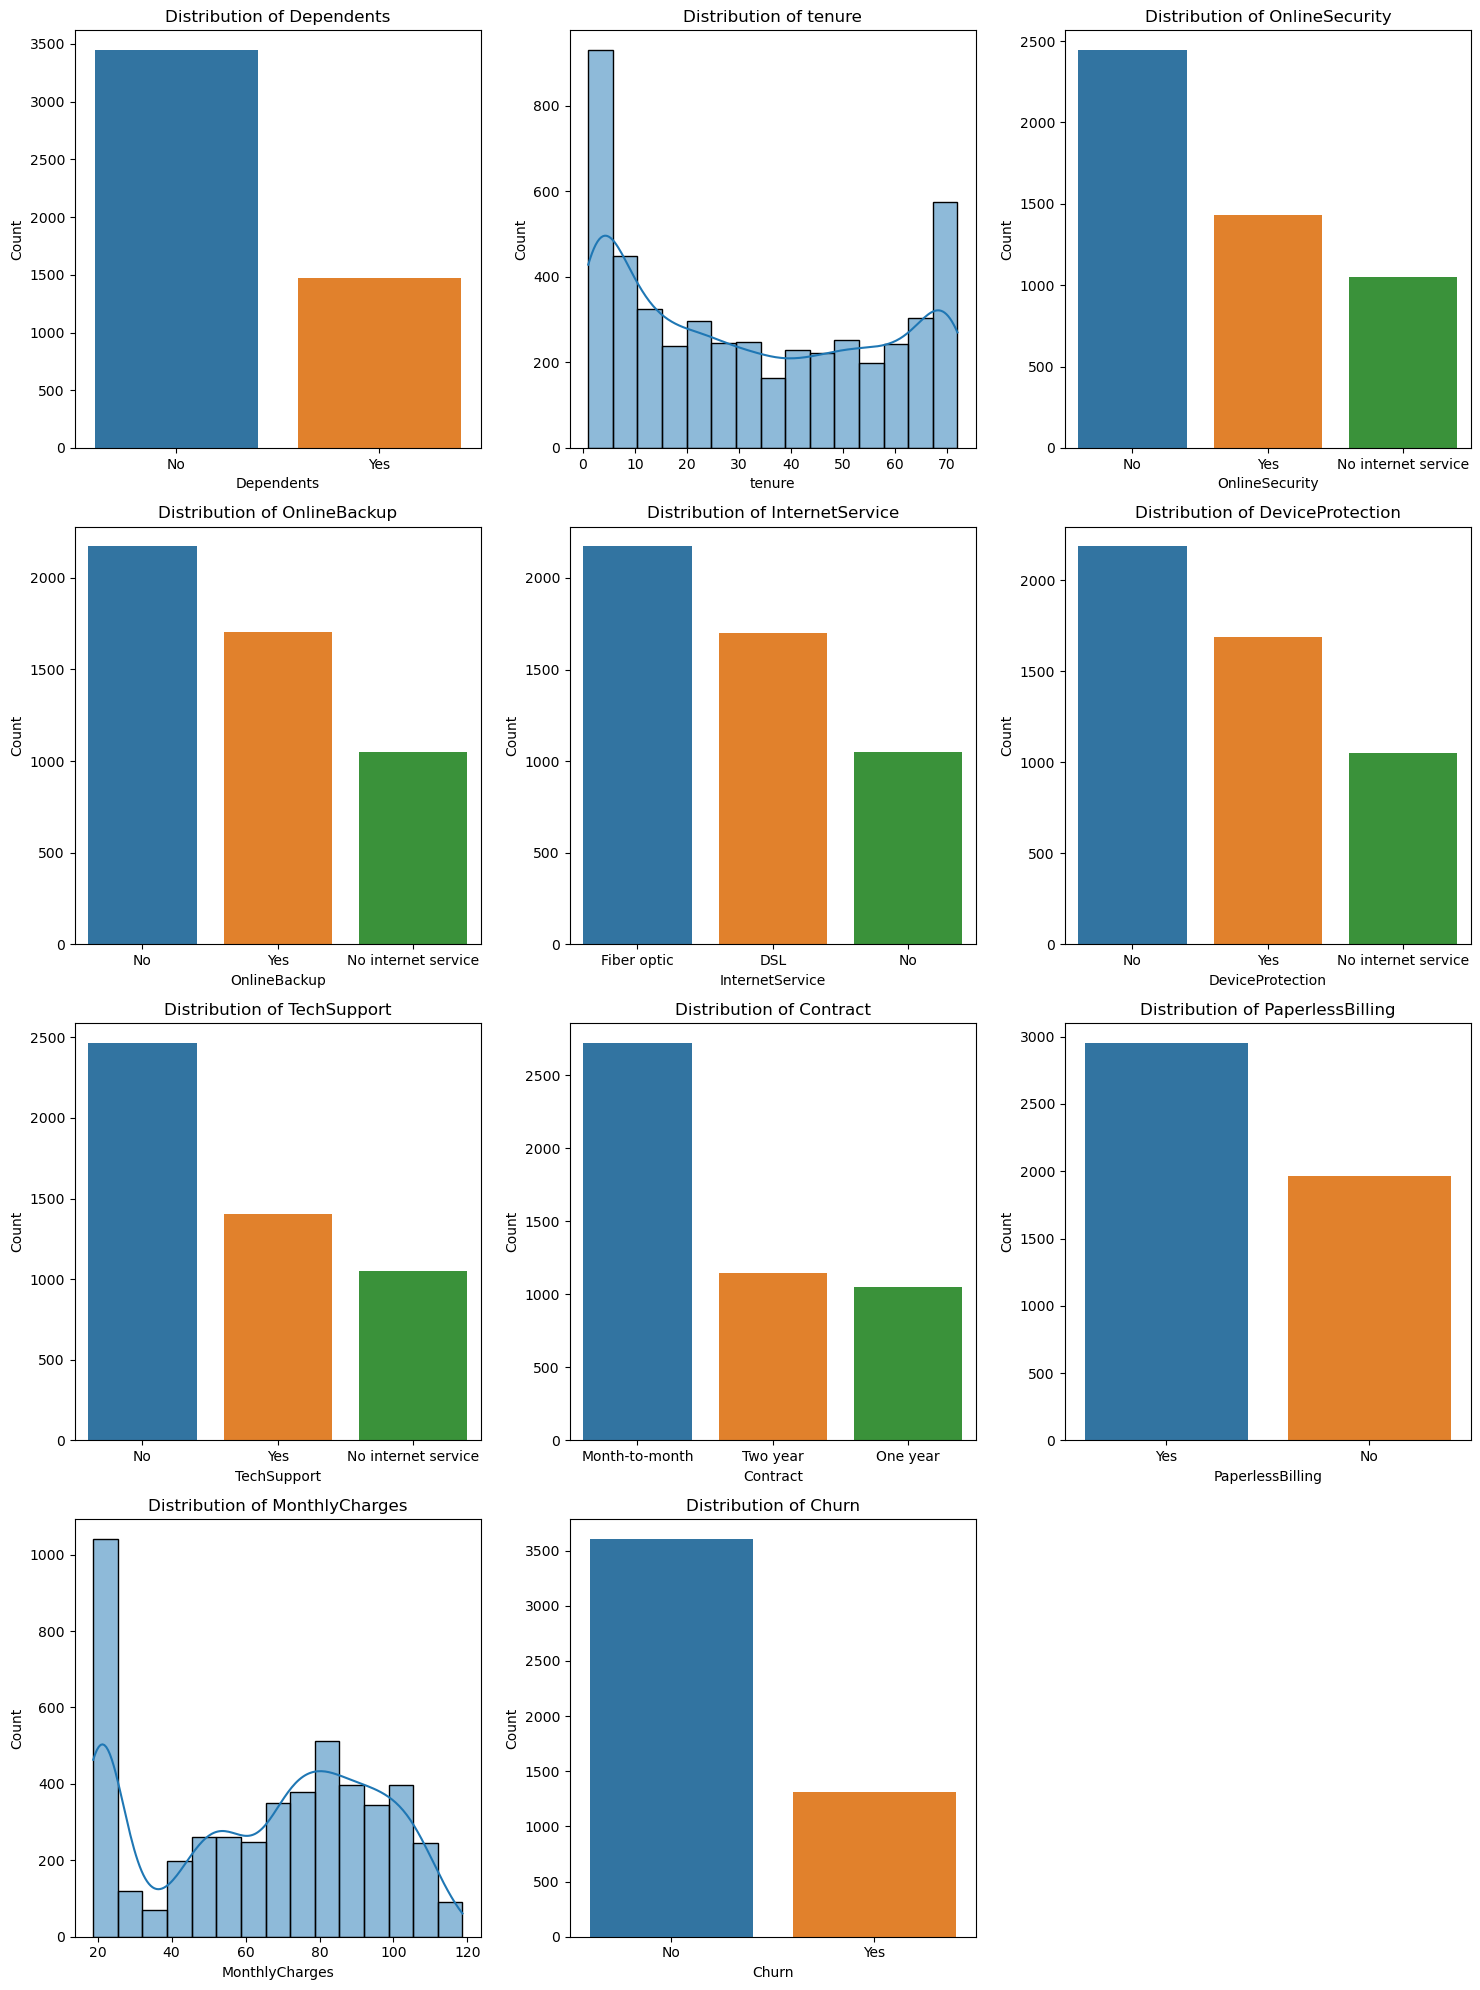

In [15]:
import math
# Set the number of rows and columns for the grid
num_cols = len(df.columns)
rows = math.ceil(num_cols / 3)  # Calculate the required number of rows
cols = 3  # Fixed number of columns

# Create the subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Loop through each column and plot
for i, col in enumerate(df.columns):
    if df[col].dtype in ['int64', 'float64']:  # For numeric data
        sns.histplot(df[col], bins=15, kde=True, ax=axes[i])
    else:  # For categorical data
        # Aggregate counts for the categorical data
        category_counts = df[col].value_counts().reset_index()
        category_counts.columns = [col, 'Count']

        # Use sns.barplot for custom counts
        sns.barplot(x=col, y='Count', data=category_counts, ax=axes[i], palette='tab10')
    axes[i].set_title(f'Distribution of {col}')

# Remove empty subplots if columns < grid size
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Remove unused axes

plt.tight_layout()
plt.show()


Based on The Graph Above, we can see the distribution of data on each column, where we have 11 insight from 11 column

In [16]:
no_internet=df[df['InternetService']=='No']
no_internet['OnlineSecurity'].value_counts()

OnlineSecurity
No internet service    1049
Name: count, dtype: int64

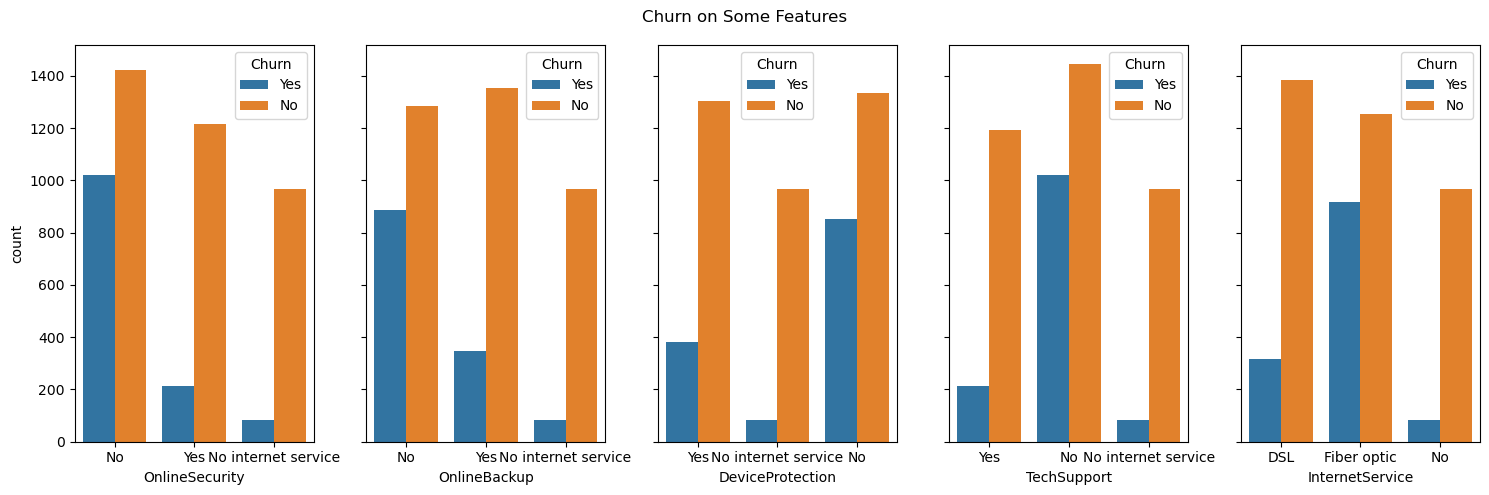

In [17]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5), sharey=True)

# Set the title for the whole figure
plt.suptitle("Churn on Some Features")

# Create the countplots
sns.countplot(x="OnlineSecurity", data=df, hue="Churn", ax=axes[0])
sns.countplot(x="OnlineBackup", data=df, hue="Churn", ax=axes[1])
sns.countplot(x="DeviceProtection", data=df, hue="Churn", ax=axes[2])
sns.countplot(x="TechSupport", data=df, hue="Churn", ax=axes[3])
sns.countplot(x="InternetService", data=df, hue="Churn", ax=axes[4])
# Show the plot
plt.tight_layout()
plt.show()

**From the chart above we can get Insight:**
- decision to churn is based on service, can we see the service without `OnlineSecurity`, `OnlineBackup`, `Device Protection` and `Tech support` are highly to churn. 
- The customer who **didnt** have `internet service` maybe they want service from TV or Phone from telco Companies, that a prove where no internet acces have lower churn than the fiber optic

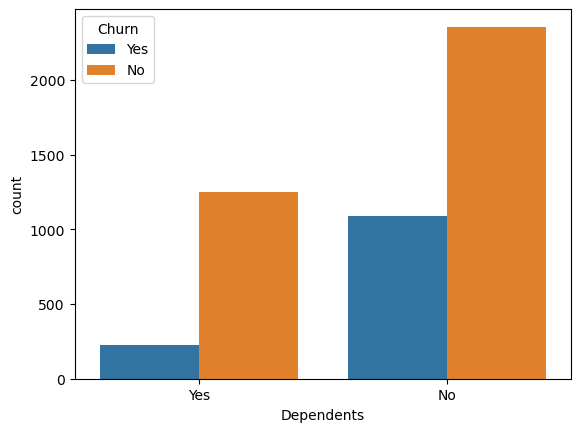

In [18]:
sns.countplot(x="Dependents", data=df, hue="Churn")
plt.show()

The Customer who dependents is the rarest churn than the no dependents, it can be assume the not loyal customer often do the churn. But beside that the ratio of churn on `No Dependents` Customer is half from no churn.

In [19]:
df.Churn.value_counts(normalize=True)

Churn
No     0.732629
Yes    0.267371
Name: proportion, dtype: float64

From the dataset, we get the data of churn label **73%** are *not churn* and **26%** are *Churn*

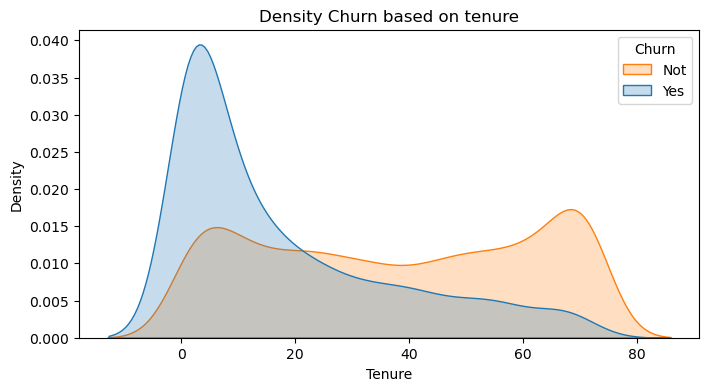

In [20]:
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df, x="tenure", hue="Churn", common_norm=False, fill=True)
plt.title("Density Churn based on tenure")
plt.xlabel("Tenure")
plt.ylabel("Density")
plt.legend(title="Churn", labels=["Not", "Yes"])
plt.show()

The early customer (before 20 month) is the most churn, can we see the peakest is between 0 - 20 month tenure

In [21]:
df.MonthlyCharges.min()

18.8

The lowest charges of data is 18.8 

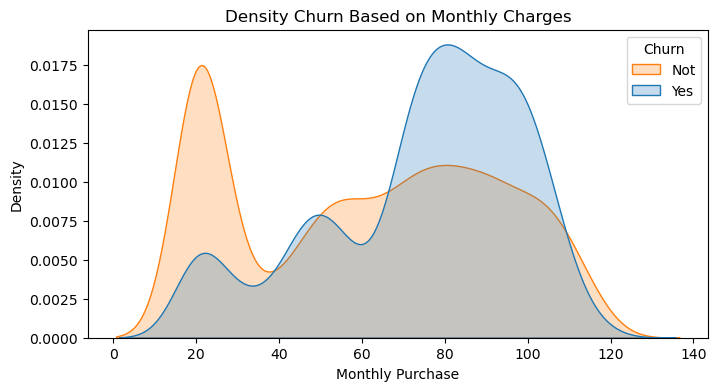

In [22]:
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn", common_norm=False, fill=True)
plt.title("Density Churn Based on Monthly Charges")
plt.xlabel("Monthly Purchase")
plt.ylabel("Density")
plt.legend(title="Churn", labels=["Not", "Yes"])

The price is the most factor to doing churn, can we see the spreading of highest churn is from `monthlypurchase` above of 60 until 100, so the pricing of this telco will be a factor of someone churn or not

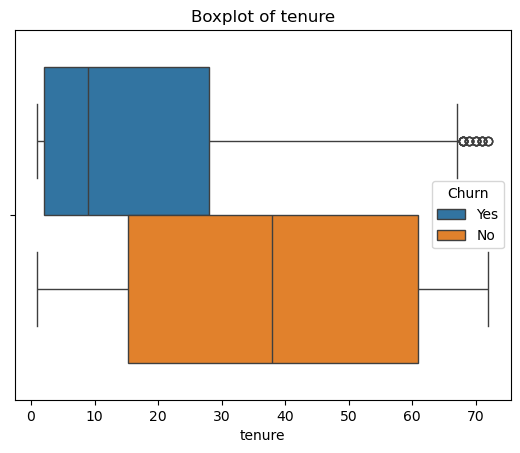

In [23]:
sns.boxplot(x='tenure', data=df,hue='Churn', palette='tab10')
plt.title('Boxplot of tenure')
plt.show()

distribution of the *not churn* based on **tenure** is normal then `yes` churn the spreading of yes churn. from that we can assume the longest tenure are loyal customer, where the subscription median on 37 month.

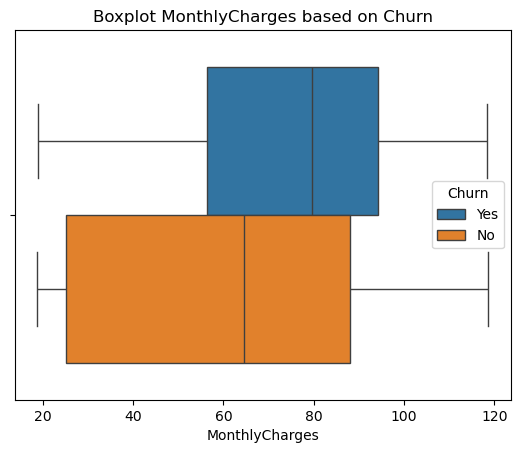

In [24]:
sns.boxplot(x='MonthlyCharges', hue='Churn', data=df, palette='tab10')
plt.title('Boxplot MonthlyCharges based on Churn')
plt.show()

Customers paying higher monthly charges are at a greater risk of churn. Businesses should focus on retention strategies for these high-paying customers, such as offering discounts or value-added services.

In [25]:
def categorize_tenure(tenure):
    if 1 <= tenure <= 11:
        return '< 1 Year'
    elif 12 <= tenure <= 23:
        return '1 - 2 Years'
    elif 24 <= tenure <= 36:
        return '2 - 3 Years'
    else:
        return '> 3 Years'
    # Tambahkan kategori lain jika diperlukan

# Buat kolom baru 'contract_type' berdasarkan 'tenure_month'
df['DurationOfTenure'] = df['tenure'].apply(categorize_tenure)
df['DurationOfTenure'].value_counts().reset_index()

,DurationOfTenure,count
0,> 3 Years,2101
1,< 1 Year,1444
2,1 - 2 Years,726
3,2 - 3 Years,651


In [26]:
df.groupby(['DurationOfTenure','Churn']).size()

DurationOfTenure  Churn
1 - 2 Years       No        510
                  Yes       216
2 - 3 Years       No        508
                  Yes       143
< 1 Year          No        730
                  Yes       714
> 3 Years         No       1858
                  Yes       243
dtype: int64

this Pivot table have a proof if the most churn come from less than 1 year, where the different almost 50:50

In [27]:
df.groupby(['InternetService','Churn']).size()

InternetService  Churn
DSL              No       1383
                 Yes       318
Fiber optic      No       1256
                 Yes       916
No               No        967
                 Yes        82
dtype: int64

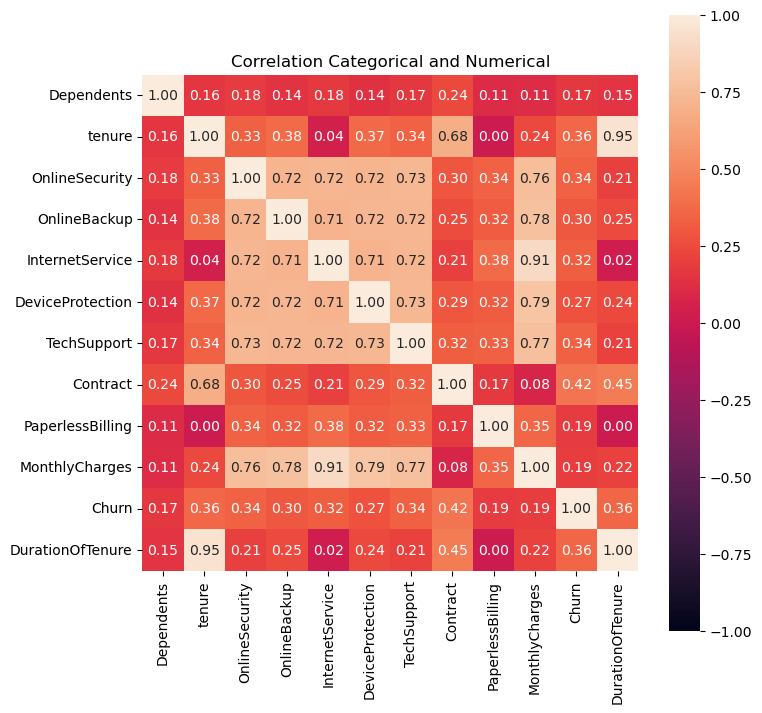

In [28]:
from dython.nominal import associations
complete_correlation = associations(
    df,
    cmap='rocket',
    title='Correlation Categorical and Numerical',
    figsize=(8,8),
    annot=True
)

correlation_matrix = complete_correlation['corr']
plt.show()

FROM THIS CORRELATION we get insight:
 - Drop `Dependents` Columns `0.17 Correlation score`
 - Drop `PaperlessBilling` Columns `0.19 Correlation score`
 - Drop `tenure` Columns `Using new Column DurationOfTenure`

## Data PreProcessing

### Data Cleaning

In [29]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Dependents,object,0,0.0,2,"[Yes, No]"
1,tenure,int64,0,0.0,72,"[44, 48]"
2,OnlineSecurity,object,0,0.0,3,"[No internet service, No]"
3,OnlineBackup,object,0,0.0,3,"[Yes, No]"
4,InternetService,object,0,0.0,3,"[DSL, No]"
5,DeviceProtection,object,0,0.0,3,"[No, Yes]"
6,TechSupport,object,0,0.0,3,"[No internet service, No]"
7,Contract,object,0,0.0,3,"[Month-to-month, Two year]"
8,PaperlessBilling,object,0,0.0,2,"[Yes, No]"
9,MonthlyCharges,float64,0,0.0,1421,"[94.2, 67.95]"


No Outlier, No Missing data so not to much to cleaningg the data

## Declaration Model

In [30]:
df['Churn'] = np.where(df['Churn']=='Yes',1,0)

Change The value from `yes` and `no` to be `1` for `churn` and `0` for `not churn`

In [31]:
x = df.drop(columns=['Churn','PaperlessBilling','Dependents','tenure'])
y = df['Churn']

Cause we want to using classification as machine learning, so we separated the dataset and label, where the label is `y` and the dataset is `x`

In [32]:
x

,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,MonthlyCharges,DurationOfTenure
0,No,No,DSL,Yes,Yes,Month-to-month,72.90,< 1 Year
1,No,Yes,Fiber optic,Yes,No,Month-to-month,82.65,1 - 2 Years
2,Yes,No,DSL,Yes,Yes,Two year,47.85,> 3 Years
3,Yes,Yes,DSL,Yes,Yes,Two year,69.65,> 3 Years
4,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,23.60,< 1 Year
...,...,...,...,...,...,...,...,...
4925,No,No,Fiber optic,Yes,Yes,Month-to-month,103.45,1 - 2 Years
4926,No,No,Fiber optic,Yes,Yes,Month-to-month,91.10,< 1 Year
4927,No internet service,No internet service,No,No internet service,No internet service,Two year,20.75,> 3 Years
4928,No,No,Fiber optic,No,No,Month-to-month,69.75,< 1 Year


In [33]:
y

0       1
1       0
2       1
3       0
4       0
       ..
4925    0
4926    0
4927    0
4928    1
4929    0
Name: Churn, Length: 4922, dtype: int64

### Feature Transform

In [34]:
ordinal_mapping_1 = [{'col':'DurationOfTenure', 'mapping':{'< 1 Year':0,
                                       '1 - 2 Years':1,
                                       '2 - 3 Years':2,
                                       '> 3 Years':3}}]

ordinal_mapping_2 = [{'col':'Contract', 'mapping':{'Month-to-month':0,
                                       'One year':1,
                                       'Two year':2}}]


pipe_ordinal_scale_first = Pipeline([
    ('ordinal', OrdinalEncoder(cols=['DurationOfTenure',], mapping=ordinal_mapping_1)),
    ('min_max_scaler', MinMaxScaler())
])

pipe_ordinal_scale_second = Pipeline([
    ('ordinal', OrdinalEncoder(cols=['Contract'], mapping=ordinal_mapping_2)),
    ('min_max_scaler', MinMaxScaler())
])

transform = ColumnTransformer(transformers=[('encoders', OneHotEncoder(drop='first'), ['OnlineSecurity', 'OnlineBackup', 
            'InternetService', 'DeviceProtection', 'TechSupport']), 
            ('pipe_ordinal_scale2', pipe_ordinal_scale_second, ['Contract']),
            ('pipe_ordinal_scale', pipe_ordinal_scale_first, ['DurationOfTenure']),
            ('minmax', MinMaxScaler(), ['MonthlyCharges'])],
             remainder='passthrough')
transform

ColumnTransformer(remainder='passthrough',
                  transformers=[('encoders', OneHotEncoder(drop='first'),
                                 ['OnlineSecurity', 'OnlineBackup',
                                  'InternetService', 'DeviceProtection',
                                  'TechSupport']),
                                ('pipe_ordinal_scale2',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(cols=['Contract'],
                                                                 mapping=[{'col': 'Contract',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': Month-to-month    0
One year          1
Tw...
                                                 ('min_max_scaler',
                                                  MinMaxScaler())]),
                                 ['Contract']),
                                ('pipe_ordinal_scale',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(cols=['DurationOfTenure'],
                                                                 mapping=[{'col': 'DurationOfTenure',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': < 1 Year       0
1 - 2 Years    1
2 - 3 Years    2
> 3 Years      3
dtype: int64}])),
                                                 ('min_max_scaler',
                                                  MinMaxScaler())]),
                                 ['DurationOfTenure']),
                                ('minmax', MinMaxScaler(), ['MonthlyCharges'])])

As we can see i create 2 `pipeline` where the first for **duration of tenure** and the second one is for **Contract**, then we continue to create *One Hot Encoding* for `InternetService`, `OnlineSecurity`, `DeviceProtection`, `TechSupport` and for the last one `MonthlyCharges` using minmaxscaler.

### Splitting Data

### Data Preparation

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [36]:
testing = pd.DataFrame(transform.fit_transform(X_train),columns=transform.get_feature_names_out())
testing.head()

,encoders__OnlineSecurity_No internet service,encoders__OnlineSecurity_Yes,encoders__OnlineBackup_No internet service,encoders__OnlineBackup_Yes,encoders__InternetService_Fiber optic,encoders__InternetService_No,encoders__DeviceProtection_No internet service,encoders__DeviceProtection_Yes,encoders__TechSupport_No internet service,encoders__TechSupport_Yes,pipe_ordinal_scale2__Contract,pipe_ordinal_scale__DurationOfTenure,minmax__MonthlyCharges
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.258888
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.000000,0.014021
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5,0.666667,0.502253
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.321482
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.672008


### MODELING & EVALUATION

In [37]:
#models classification
logreg = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
lgbm = lgb.LGBMClassifier(random_state=42)

#### Model Benchmarking : K-Fold

In [38]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transform),
        ('model',i)])
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring='roc_auc')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],'mean roc_auc':rata,'sdev':std}).set_index('model').sort_values(by='mean roc_auc',ascending=False)

[LightGBM] [Info] Number of positive: 842, number of negative: 2307
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 282
[LightGBM] [Info] Number of data points in the train set: 3149, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267386 -> initscore=-1.007923
[LightGBM] [Info] Start training from score -1.007923
[LightGBM] [Info] Number of positive: 842, number of negative: 2307
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 282
[LightGBM] [Info] Number of data points in the train set: 3149, number of used features: 13
[LightGBM] [Info] [binary:Bo

,mean roc_auc,sdev
model,,
Logistic Regression,0.833207,0.016748
LightGBM,0.810191,0.012489
XGBoost,0.804705,0.009485
KNN,0.767100,0.009542
Random Forest,0.762526,0.014577
Decision Tree,0.658687,0.009001


We can see `Linear Regression` best for ROC_AUC from another modle with default Hyperparameter

#### Model Benchmarking : Test Data

In [39]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score_roc_auc = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transform),
        ('model',i)])
    X_train, X_test
    
    estimator.fit(X_train,y_train)
    return(estimator,estimator.predict(X_test),X_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM']):
    estimator,y_pred,X_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(X_test)[:,1]
    score_roc_auc.append(roc_auc_score(y_test,y_predict_proba))
    print(j,'\n', classification_report(y_test,y_pred))
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM'],
             'roc_auc score':score_roc_auc}).set_index('model').sort_values(by='roc_auc score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       722
           1       0.71      0.51      0.60       263

    accuracy                           0.81       985
   macro avg       0.77      0.72      0.74       985
weighted avg       0.80      0.81      0.80       985

KNN 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       722
           1       0.58      0.47      0.52       263

    accuracy                           0.77       985
   macro avg       0.70      0.67      0.68       985
weighted avg       0.75      0.77      0.76       985

Decision Tree 
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       722
           1       0.53      0.52      0.53       263

    accuracy                           0.75       985
   macro avg       0.68      0.68      0.68       985
weighted avg       0.75      0

,roc_auc score
model,
Logistic Regression,0.857478
LightGBM,0.842532
XGBoost,0.834861
KNN,0.784047
Random Forest,0.779183
Decision Tree,0.685606


`Logistic Regression` Lead again from other model, when we test with test data

#### Model Benchmarking: K-Fold with Imbalance Treatment

In [40]:
# Imbalance Treatment
ros = RandomOverSampler(random_state=42)
rus = RandomUnderSampler(random_state=42)
smote = SMOTE(random_state=42)
near = NearMiss()

In [41]:
models = {
    'Logistic Regression': logreg,
    'Decision Tree': dt,
    'XGBoost': xgb,
    'Random Forest': rf,
    'Light GBM': lgbm,
    'K Neighbors Classifier': knn
}


resamples = {
    'none': None,
    'ros': ros,
    'rus': rus,
    'smote': smote,
    'near miss': near,
}

# Metrics Classification
metrics = {
    'balanced_accuracy': 'balanced_accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

test_accuracy_array = []
test_precision_array = []
test_recall_array = []
test_f1_array = []
list_model = []
list_resample = []

# Iterate over all models, resampling, and cross-validate method
for name_resample, resample in resamples.items():
    for name_model, model in models.items():
        crossval = StratifiedKFold(n_splits=5)

        if resample is None:
            estimator = Pipeline([
                ('preprocessor', transform),
                ('model', model),
            ])
        else:
            estimator = Pipeline([
                ('preprocessor', transform),
                ('resample', resample),
                ('model', model),
            ])

        list_model.append(name_model)
        list_resample.append(name_resample)
        scores = cross_validate(estimator, X_train, y_train, cv=crossval, scoring=metrics)
        test_accuracy_array.append(scores['test_balanced_accuracy'].mean() * 100)
        test_precision_array.append(scores['test_precision'].mean() * 100)
        test_recall_array.append(scores['test_recall'].mean() * 100)
        test_f1_array.append(scores['test_f1'].mean() * 100)

# Create a dataframe for all of the benchmarking output
model_bench = pd.DataFrame({
    'model': list_model,
    'resample': list_resample,
    'accuracy': test_accuracy_array,
    'precision': test_precision_array,
    'recall': test_recall_array,
    'F1': test_f1_array
})

model_bench

[LightGBM] [Info] Number of positive: 842, number of negative: 2307
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 282
[LightGBM] [Info] Number of data points in the train set: 3149, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267386 -> initscore=-1.007923
[LightGBM] [Info] Start training from score -1.007923
[LightGBM] [Info] Number of positive: 842, number of negative: 2307
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 282
[LightGBM] [Info] Number of data points in the train set: 3149, number of used features: 13
[LightGBM] [Info] [binary:Bo

,model,resample,accuracy,precision,recall,F1
0,Logistic Regression,none,68.719053,63.528434,47.389303,54.274953
1,Decision Tree,none,64.796243,49.629268,47.103137,48.287414
2,XGBoost,none,68.952503,58.284250,51.289551,54.500635
3,Random Forest,none,66.185220,52.390761,48.529452,50.334427
4,Light GBM,none,69.100757,59.619174,50.719025,54.768658
5,K Neighbors Classifier,none,67.918564,57.267315,49.291356,52.949860
6,Logistic Regression,ros,75.532543,50.879923,79.011058,61.875697
7,Decision Tree,ros,65.399219,47.594604,51.568946,49.489553
8,XGBoost,ros,72.453387,51.729594,68.000000,58.724942
9,Random Forest,ros,65.832374,48.731847,51.568946,50.073675


from 4 imbalance treatement, `RandomOverSampling`, `RandomUnderSampling`, `SMOTE` and `NearMiss` there are only 3 can optimize the accuracy, precision and recall of each model. there are `RandomOverSampling`, `RandomUnderSampling` and `SMOTE`. We can see the **Linear Regresion Model** from accuracy 68.7% to be 75.5% with `RandomOverSampling`, `RandomUnderSampling` and `SMOTE`.

In [42]:
top_model = model_bench.sort_values(by='recall', ascending=False).head()
top_model

,model,resample,accuracy,precision,recall,F1
12,Logistic Regression,rus,75.592005,50.839569,79.199729,61.910620
6,Logistic Regression,ros,75.532543,50.879923,79.011058,61.875697
18,Logistic Regression,smote,75.468299,51.049725,78.535771,61.852585
16,Light GBM,rus,74.052146,48.587256,78.443692,59.990449
14,XGBoost,rus,72.737801,47.211380,76.924848,58.494548


**FOCUS ON RECALL**
Recall is one of the evaluation metrics often used in classification problems, especially for imbalanced datasets. Remember to focus on the model's ability to correctly recognize the positive class.
with pattern like this:
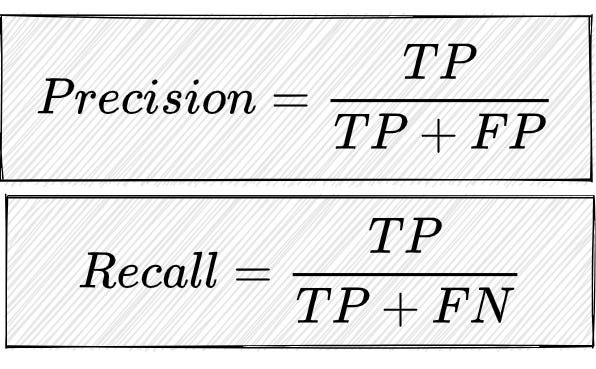\
Where if we want this score higher we should minimalize the score of FN or `False Negative`so the result of recall can be higher
​


BEST MODELS

In [43]:
top_recall_per_model = model_bench.loc[model_bench.groupby('model')['recall'].idxmax()]
top_recall_per_model = top_recall_per_model.sort_values(by='recall', ascending=False)
top_recall_per_model

,model,resample,accuracy,precision,recall,F1
12,Logistic Regression,rus,75.592005,50.839569,79.199729,61.910620
16,Light GBM,rus,74.052146,48.587256,78.443692,59.990449
14,XGBoost,rus,72.737801,47.211380,76.924848,58.494548
17,K Neighbors Classifier,rus,73.049502,48.129536,76.161589,58.957460
15,Random Forest,rus,69.751862,45.968901,69.323855,55.264010
13,Decision Tree,rus,67.949001,43.892518,67.521101,53.162537


From the imbalancing data and k-fold we get a best model there is `Logistic Regresion` where the recall is `79.19%` which is the higher Recall from this dataset and model

#### Modelling with Data Test

After Benchmarking from 6 models, we decide to use `Logistic Regresion` as our model, so we focusing on this model and try to modelling and resampling using test data

In [44]:
logreg = LogisticRegression(random_state=42)

ros = RandomOverSampler(random_state=42)
rus = RandomUnderSampler(random_state=42)
smote = SMOTE(random_state=42)


models = [
    ('Logistic Regression', logreg),
]


resamples = [
    ('RandomOverSampling', ros),
    ('RandomUnderSampling', rus),
    ('smote', smote)
]


metrics = []
conf_matrix = []

for name_model, model in models:
    for name_resample, resample in resamples:
        pipeline = Pipeline([
            ('transformer', transform),  
            ('resampling', resample),
            ('model', model)
        ])

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        metrics.append([
            f'{name_model} with {name_resample}',
            accuracy_score(y_test, y_pred) * 100,
            precision_score(y_test, y_pred) * 100,
            recall_score(y_test, y_pred) * 100,
            f1_score(y_test, y_pred) * 100
        ])

        conf_matrix.append(confusion_matrix(y_test, y_pred))
        
metrics_df = pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
metrics_df

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression with RandomOverSampling,75.126904,52.227723,80.228137,63.268366
1,Logistic Regression with RandomUnderSampling,74.822335,51.824818,80.988593,63.204748
2,Logistic Regression with smote,74.720812,51.724138,79.847909,62.780269


RandomUnderSampling is the highest recall

In [45]:
metrics_df['Model'] = metrics_df['Model'].replace({
    'Logistic Regression with RandomUnderSampling': 'Logistic Regression Before Tune'
})

metrics_df_selected = metrics_df[metrics_df['Model'] == 'Logistic Regression Before Tune']
metrics_df_selected

,Model,Accuracy,Precision,Recall,F1
1,Logistic Regression Before Tune,74.822335,51.824818,80.988593,63.204748


We Choose the best default parameter modeling test, where this want to be a treshhold\
Then we do `Hyperparameter Tuning` using `Logistic Regresion` where we want have more good result from this modeling.\
As we can see our trehshold recall is 80.1%

#### HYPERPARAMETER TUNING : LOGISTIC REGRESION

https://medium.com/codex/do-i-need-to-tune-logistic-regression-hyperparameters-1cb2b81fca69


In [52]:
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import recall_score
import pandas as pd

# Define Logistic Regression and RandomOverSampler
logreg = LogisticRegression(random_state=42)
ros = RandomOverSampler(random_state=20)

# Pipeline
pipe_model = ImbPipeline([
    ('prep', transform),  
    ('resampling', rus),
    ('model', logreg)
])

# Define Hyperparameter Space
hyperparam_space = {
    'model__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'model__C': [0.1, 1, 10, 100],
    'model__solver': ['lbfgs', 'liblinear', 'saga', 'sag'],
    'model__max_iter': [100, 1000, 5000]
}

# GridSearchCV
grid_search_cv = GridSearchCV(
    estimator=pipe_model,
    param_grid=hyperparam_space,
    cv=5,
    scoring='recall',  # Optimize for recall
    n_jobs=-1
)

# Fit the model
grid_search_cv.fit(X_train, y_train)

# Display the best parameters and score
print("Best Parameters:", grid_search_cv.best_params_)
print("Best Recall Score:", grid_search_cv.best_score_)

# Evaluate on Test Set
y_pred = grid_search_cv.best_estimator_.predict(X_test)
recall = recall_score(y_test, y_pred)
print("Recall on Test Set:", recall)


Best Parameters: {'model__C': 0.1, 'model__max_iter': 100, 'model__penalty': 'l1', 'model__solver': 'saga'}
Best Recall Score: 0.8005551794177386
Recall on Test Set: 0.8136882129277566


In [53]:
best_params = grid_search_cv.best_params_
best_score = grid_search_cv.best_score_

print("Best Parameters:", best_params)
print("Best Recall Score:", best_score)

Best Parameters: {'model__C': 0.1, 'model__max_iter': 100, 'model__penalty': 'l1', 'model__solver': 'saga'}
Best Recall Score: 0.8005551794177386


In [54]:
logreg_tuning = grid_search_cv.best_estimator_
logreg_tuning.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoders',
                                                  OneHotEncoder(drop='first'),
                                                  ['OnlineSecurity',
                                                   'OnlineBackup',
                                                   'InternetService',
                                                   'DeviceProtection',
                                                   'TechSupport']),
                                                 ('pipe_ordinal_scale2',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(cols=['Contract'],
                                                                                  mapping=[{'col': 'Contract',
                                                                                            'data_type': dtype('O'),
                                                                                            'mapping': M...
                                                                                  mapping=[{'col': 'DurationOfTenure',
                                                                                            'data_type': dtype('O'),
                                                                                            'mapping': < 1 Year       0
1 - 2 Years    1
2 - 3 Years    2
> 3 Years      3
dtype: int64}])),
                                                                  ('min_max_scaler',
                                                                   MinMaxScaler())]),
                                                  ['DurationOfTenure']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['MonthlyCharges'])])),
                ('resampling', RandomUnderSampler(random_state=42)),
                ('model',
                 LogisticRegression(C=0.1, penalty='l1', random_state=42,
                                    solver='saga'))])

In [55]:
y_pred_logreg_tuning = logreg_tuning.predict(X_test)

accuracy_logreg_tuning = accuracy_score(y_test, y_pred_logreg_tuning) * 100
precision_logreg_tuning = precision_score(y_test, y_pred_logreg_tuning) * 100
recall_logreg_tuning = recall_score(y_test, y_pred_logreg_tuning) * 100
f1_logreg_tuning = f1_score(y_test, y_pred_logreg_tuning) * 100

logreg_after_tuning = pd.DataFrame({
    'Model': ['Logistic Regression After Tuning'],
    'Accuracy': [accuracy_logreg_tuning],
    'Precision': [precision_logreg_tuning],
    'Recall': [recall_logreg_tuning],
    'F1': [f1_logreg_tuning]
})


metrics_df_selected = metrics_df_selected.reset_index(drop=True)

# Concat DataFrame with Metrics Before Tune
metrics_combined = pd.concat([logreg_after_tuning, metrics_df_selected], ignore_index=True)
metrics_combined

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression After Tuning,73.299492,50.000000,81.368821,61.939219
1,Logistic Regression Before Tune,74.822335,51.824818,80.988593,63.204748


the recall using `hyperparameter tuning` resulted score higher than without tuning, that what we expected with `hyperparameter tuning` either only increase **1%** its a good move for the model.\
our recall from **80.9%** to be **81.3%**

In [56]:
# Compute recall on the training set
train_pred = logreg_tuning.predict(X_train)
train_recall = recall_score(y_train, train_pred)

# Compute recall on the test set
test_pred = logreg_tuning.predict(X_test)
test_recall = recall_score(y_test, test_pred)

# Create a DataFrame with the results
df_results = pd.DataFrame({
    'model': ['Logistic Regression After Tuning'],
    'Train Recall': [train_recall],
    'Test Recall': [test_recall],
}).set_index('model')


df_results

,Train Recall,Test Recall
model,,
Logistic Regression After Tuning,0.805318,0.813688


### EVALUATION METRICS

##### CONFUSION MATRIX

In [57]:
# Evaluation with Best Estimator
y_pred_test = grid_search_cv.best_estimator_.predict(X_test)

print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.70      0.79       722
           1       0.50      0.81      0.62       263

    accuracy                           0.73       985
   macro avg       0.71      0.76      0.71       985
weighted avg       0.80      0.73      0.75       985

[[508 214]
 [ 49 214]]


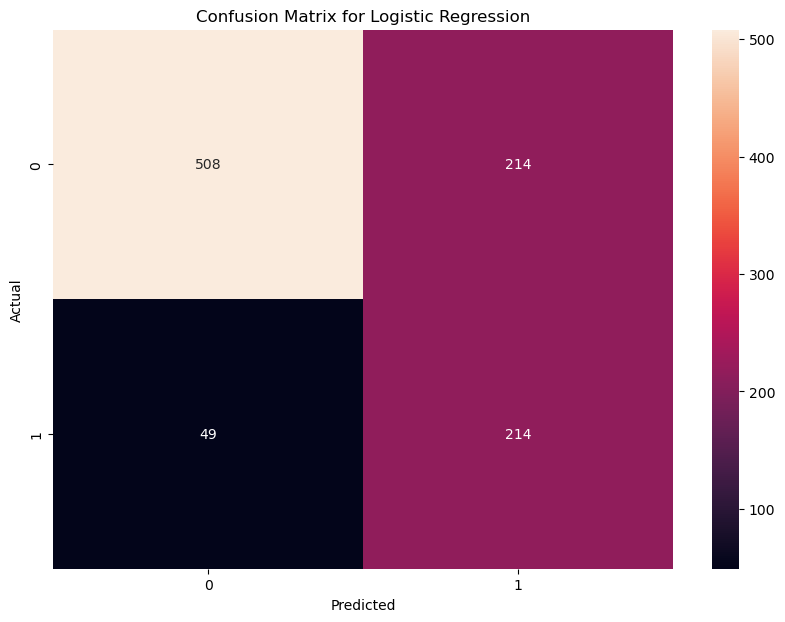

In [58]:
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='rocket')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

##### ROC-AUC Recall Value

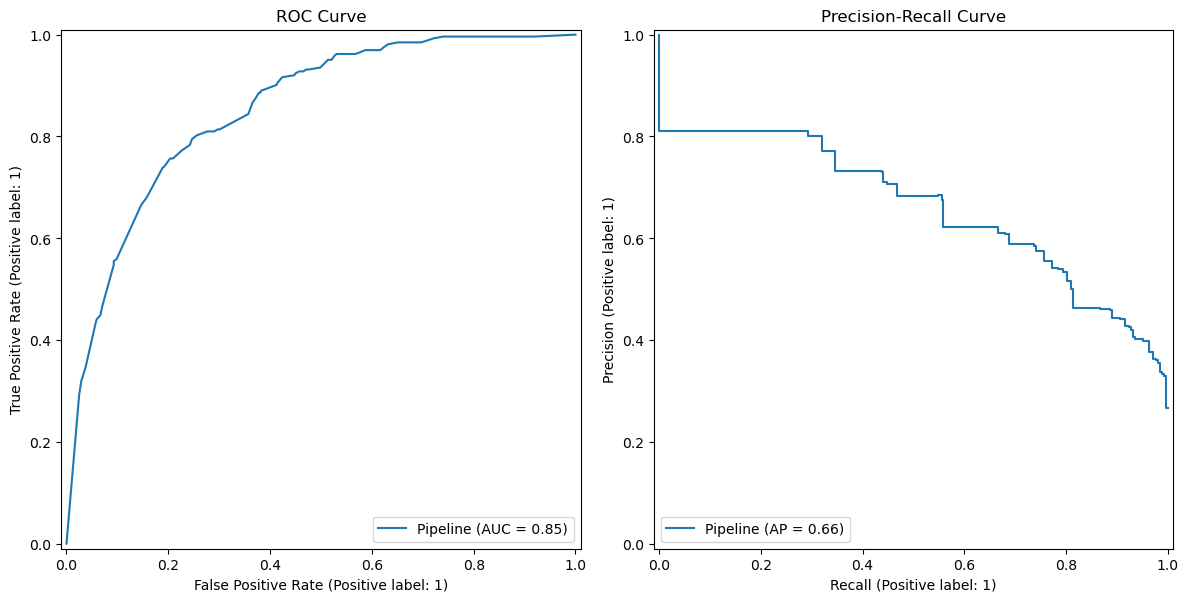

In [59]:
plt.close('all')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

RocCurveDisplay.from_estimator(grid_search_cv.best_estimator_, X_test, y_test, ax=ax1)
PrecisionRecallDisplay.from_estimator(grid_search_cv.best_estimator_, X_test, y_test, ax=ax2)

ax1.set_title('ROC Curve')
ax2.set_title('Precision-Recall Curve')

plt.tight_layout()
plt.show()

### FEATURE IMPORTANCE

<Axes: title={'center': 'Feature Coefficients of the FINAL MODEL'}>

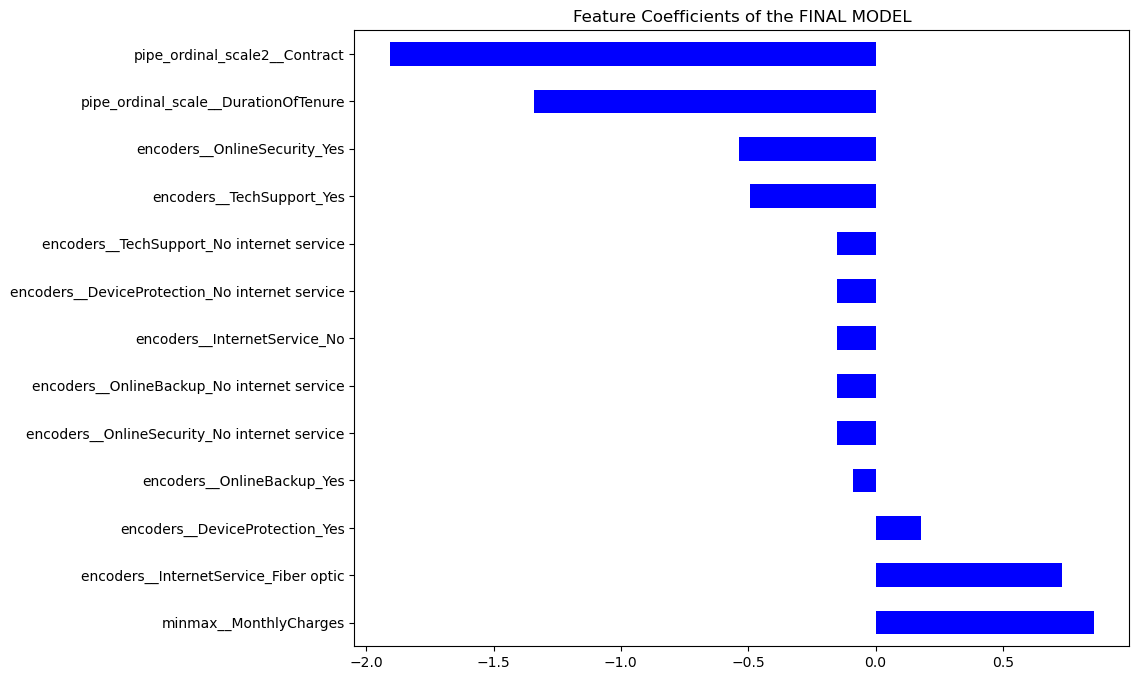

In [60]:
from imblearn.pipeline import Pipeline  # Import Pipeline from imblearn
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
# Define Logistic Regression and RandomUnderSampler
logreg = LogisticRegression(random_state=42)
rus = RandomUnderSampler(random_state=20)

# Create pipeline using imblearn
estimator = Pipeline([
    ('prep', transform),
    ('resample', rus),
    ('model', logreg)
])
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)

# Evaluate
recall = recall_score(y_test, y_pred)
plt.figure(figsize=(10, 8))

coef = pd.Series(estimator['model'].coef_[0], transform.get_feature_names_out()).sort_values(ascending = False)
coef.plot(kind='barh', title='Feature Coefficients of the FINAL MODEL', color='blue')

##### SHAPLE VALUE

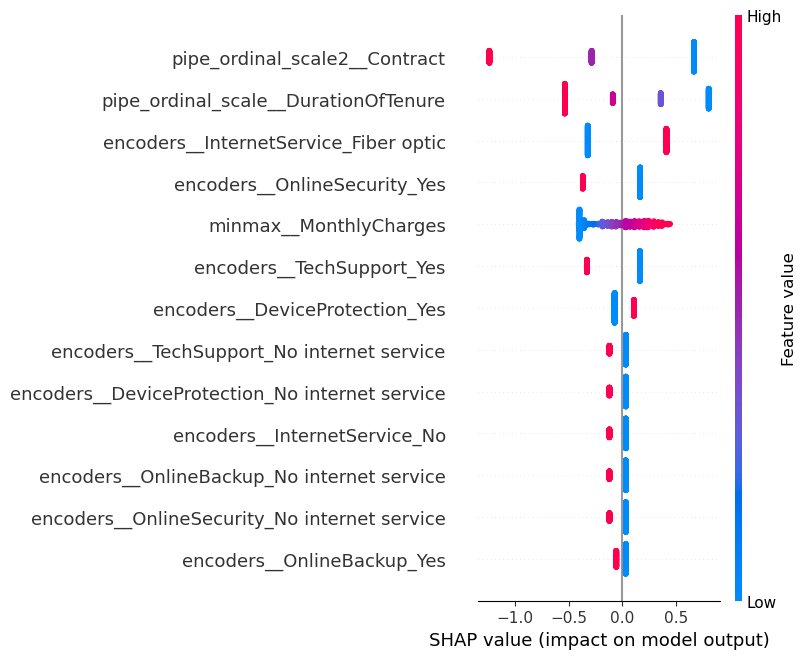

In [61]:
import shap
estimator = Pipeline([
    ('prep', transform),
    ('resample', rus),
    ('model', logreg)
])

# 6. Train Pipeline
estimator.fit(X_train, y_train)
model = estimator.named_steps['model']
transform = estimator.named_steps['prep']

# Transform the test set to match the model's input
X_test_transformed = transform.transform(X_test)

# Initialize SHAP explainer for Logistic Regression
explainer = shap.LinearExplainer(model, X_test_transformed)

# Compute SHAP values
shap_values = explainer.shap_values(X_test_transformed)

# Visualize SHAP values for the first prediction
shap.summary_plot(shap_values, X_test_transformed, feature_names=transform.get_feature_names_out())

In [62]:
y_pred_default = estimator.predict(X_test)
y_pred_proba_default = estimator.predict_proba(X_test)
y_pred_tuned = logreg_tuning.predict(X_test)
y_pred_proba_tuned = logreg_tuning.predict_proba(X_test)

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

print('ROC AUC Score Default LOGREG : ', roc_auc_default)
print('ROC AUC Score Tuned LOGREG : ', roc_auc_tuned)

ROC AUC Score Default LOGREG :  0.854686496108191
ROC AUC Score Tuned LOGREG :  0.8521481309838533


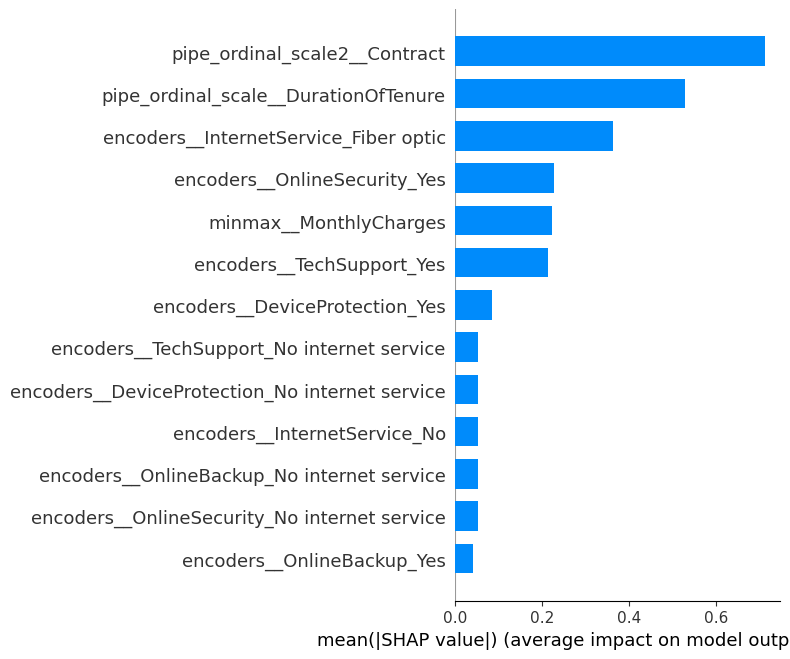

In [63]:
shap.summary_plot(shap_values, X_test_transformed, feature_names=transform.get_feature_names_out(), plot_type='bar')


In [64]:
transform.get_feature_names_out()

array(['encoders__OnlineSecurity_No internet service',
       'encoders__OnlineSecurity_Yes',
       'encoders__OnlineBackup_No internet service',
       'encoders__OnlineBackup_Yes',
       'encoders__InternetService_Fiber optic',
       'encoders__InternetService_No',
       'encoders__DeviceProtection_No internet service',
       'encoders__DeviceProtection_Yes',
       'encoders__TechSupport_No internet service',
       'encoders__TechSupport_Yes', 'pipe_ordinal_scale2__Contract',
       'pipe_ordinal_scale__DurationOfTenure', 'minmax__MonthlyCharges'],
      dtype=object)

- optimize (probability optimisation)
- precisioin recall curve
- Feature selection
- ROC-AUC
- Feature Importance
- Shape value
- conclusion
- recomendation

In [66]:
joblib.dump(grid_search_cv.best_estimator_, 'best_model_telco_logreg.pkl')

['best_model_telco_logreg.pkl']

## Evaluation

## Optimation and Tuning

### Hyperparameter Tuning

### Feature Selection

## Deployment

### Export Model (PKL)